In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("nifty_50_stock_data.csv")
df

,Symbol,Open,High,Low,LTP,Chng,Volume (lacs),52w H,52w L,Close
0,ADANIPORTS,750.00,766.00,713.25,715.00,-47.45,72.20,901.00,384.40,715.00
1,ASIANPAINT,3101.00,3167.35,3091.00,3138.00,-6.25,10.29,3505.00,2117.15,3138.00
2,AXISBANK,669.00,674.90,660.45,661.00,-18.90,102.53,866.90,568.40,661.00
3,BAJAJ-AUTO,3370.00,3383.50,3320.00,3335.00,-56.70,3.42,4361.40,3041.00,3335.00
4,BAJAJFINSV,17200.00,17237.20,16610.00,16684.00,-684.85,3.42,19325.00,8273.70,16684.00
5,BAJFINANCE,7021.00,7047.90,6775.00,6780.00,-345.80,16.89,8050.00,4362.00,6780.00
6,BHARTIARTL,763.00,763.00,733.10,735.85,-29.30,111.43,781.80,454.11,735.85
7,BPCL,397.15,397.20,375.00,377.40,-22.70,100.23,503.00,357.00,377.40
8,BRITANNIA,3560.00,3635.10,3533.95,3566.60,-6.80,3.73,4153.00,3317.30,3566.60
9,CIPLA,892.00,976.05,890.65,965.00,65.05,144.59,1005.00,726.50,965.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         50 non-null     object 
 1   Open           50 non-null     float64
 2   High           50 non-null     float64
 3   Low            50 non-null     float64
 4   LTP            50 non-null     float64
 5   Chng           50 non-null     float64
 6   Volume (lacs)  50 non-null     float64
 7   52w H          50 non-null     float64
 8   52w L          50 non-null     float64
 9   Close          50 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.0+ KB


In [4]:
df.isnull().sum() # No null values

Symbol           0
Open             0
High             0
Low              0
LTP              0
Chng             0
Volume (lacs)    0
52w H            0
52w L            0
Close            0
dtype: int64

In [5]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', 'Volume (lacs)',
       '52w H', '52w L', 'Close'],
      dtype='object')

In [6]:
df['Open'] = df["Open"] = [float(str(i).replace(",", "")) for i in df["Open"]]
df['High'] = df["High"] = [float(str(i).replace(",", "")) for i in df["High"]]
df['Low'] = df["Low"] = [float(str(i).replace(",", "")) for i in df["Low"]]
df['LTP'] = df["LTP"] = [float(str(i).replace(",", "")) for i in df["LTP"]]
df['Chng'] = df["Chng"] = [float(str(i).replace(",", "")) for i in df["Chng"]]
df['Volume (lacs)'] = df["Volume (lacs)"] = [float(str(i).replace(",", "")) for i in df["Volume (lacs)"]]
df['52w H'] = df["52w H"] = [float(str(i).replace(",", "")) for i in df["52w H"]]
df['52w L'] = df["52w L"] = [float(str(i).replace(",", "")) for i in df["52w L"]]
df['Close'] = df["Close"] = [float(str(i).replace(",", "")) for i in df["Close"]]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         50 non-null     object 
 1   Open           50 non-null     float64
 2   High           50 non-null     float64
 3   Low            50 non-null     float64
 4   LTP            50 non-null     float64
 5   Chng           50 non-null     float64
 6   Volume (lacs)  50 non-null     float64
 7   52w H          50 non-null     float64
 8   52w L          50 non-null     float64
 9   Close          50 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.0+ KB


In [8]:
df['Symbol'].replace({
 'ADANIPORTS': 1,
 'ASIANPAINT': 2,
 'AXISBANK': 3,
 'BAJAJ-AUTO': 4,
 'BAJAJFINSV': 5,
 'BAJFINANCE': 6,
 'BHARTIARTL': 7,
 'BPCL': 8,
 'BRITANNIA': 9,
 'CIPLA': 10,
 'COALINDIA': 11,
 'DIVISLAB': 12,
 'DRREDDY': 13,
 'EICHERMOT': 14,
 'GRASIM': 15,
 'HCLTECH': 16,
 'HDFC': 17,
 'HDFCBANK': 18,
 'HDFCLIFE': 19,
 'HEROMOTOCO': 20,
 'HINDALCO': 21,
 'HINDUNILVR': 22,
 'ICICIBANK': 23,
 'INDUSINDBK': 24,
 'INFY': 25,
 'IOC': 26,
 'ITC': 27,
 'JSWSTEEL': 28,
 'KOTAKBANK': 29,
 'LT': 30,
 'M&M': 31,
 'MARUTI': 32,
 'NESTLEIND': 33,
 'NTPC': 34,
 'ONGC': 35,
 'POWERGRID': 36,
 'RELIANCE': 37,
 'SBILIFE': 38,
 'SBIN': 39,
 'SHREECEM': 40,
 'SUNPHARMA': 41,
 'TATACONSUM': 42,
 'TATAMOTORS': 43,
 'TATASTEEL': 44,
 'TCS': 45,
 'TECHM': 46,
 'TITAN': 47,
 'ULTRACEMCO': 48,
 'UPL': 49,
 'WIPRO': 50
 },inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         50 non-null     int64  
 1   Open           50 non-null     float64
 2   High           50 non-null     float64
 3   Low            50 non-null     float64
 4   LTP            50 non-null     float64
 5   Chng           50 non-null     float64
 6   Volume (lacs)  50 non-null     float64
 7   52w H          50 non-null     float64
 8   52w L          50 non-null     float64
 9   Close          50 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 4.0 KB


<Axes: >

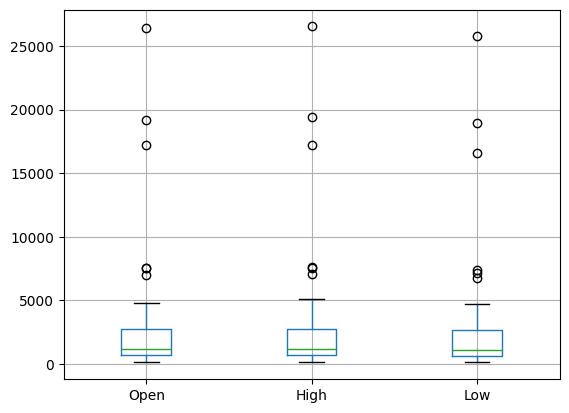

In [10]:
df[['Open','High','Low']].boxplot()

In [11]:
Q3 = np.quantile(df['Open'], 0.75)
Q1 = np.quantile(df['Open'], 0.25)
print("Q1 :",Q1)
print("Q3 :",Q3)
IQR = Q3 - Q1
print("IQR :",IQR)

open_upper_tail = Q3 + 1.5*IQR
open_lower_tail = Q1 - 1.5*IQR
print("Upper Tail :", open_upper_tail)
# print("Lower Tail :", open_lower_tail)

Q1 : 673.0
Q3 : 2760.2625
IQR : 2087.2625
Upper Tail : 5891.15625


In [12]:

print(df['Open'].mean())
print(df['Open'].median())
print(open_upper_tail)

2985.739
1155.95
5891.15625


In [13]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', 'Volume (lacs)',
       '52w H', '52w L', 'Close'],
      dtype='object')

In [26]:
df.boxplot()

<Axes: ylabel='Chng'>

In [28]:
from scipy.stats import boxcox, yeojohnson
for col in df:
    try:
        array = boxcox(df[col])[0]
    except:
        array = yeojohnson(df[col])[0]
    plt.figure()   # plots figure for each iteration
    plt.gca().set(label= col)
    # print(col)
    plt.boxplot(array)

In [29]:
sns.boxplot(df['Chng'])

<Axes: label='Close', ylabel='Chng'>

In [30]:
Q3 = np.quantile(df['Chng'], 0.75)
Q1 = np.quantile(df['Chng'], 0.25)
print("Q1 :",Q1)
print("Q3 :",Q3)
IQR = Q3 - Q1
print("IQR :",IQR)

upper_tail = Q3 + 1.5*IQR
lower_tail = Q1 - 1.5*IQR
print("Upper Tail :", upper_tail)
print("Lower Tail :", lower_tail)

Q1 : -66.775
Q3 : -7.8125
IQR : 58.962500000000006
Upper Tail : 80.63125000000001
Lower Tail : -155.21875


In [31]:
print(df['Chng'].mean())
print(df['Chng'].median())
print(upper_tail)
print(lower_tail)

-70.13300000000001
-29.975
80.63125000000001
-155.21875


In [32]:
sns.boxplot(np.cbrt(df['Chng']))

<Axes: label='Close', ylabel='Chng'>

In [33]:
sns.kdeplot(df['Chng'])

<Axes: label='Close', xlabel='Chng', ylabel='Chng'>

In [34]:
df['Chng'].to_numpy()

array([ -47.45,   -6.25,  -18.9 ,  -56.7 , -684.85, -345.8 ,  -29.3 ,
        -22.7 ,   -6.8 ,   65.05,   -2.65,  140.2 ,  158.4 ,  -79.65,
        -80.95,  -13.15, -122.75,  -36.45,  -19.05,  -67.9 ,  -29.35,
         -8.15,  -30.6 ,  -59.35,  -32.85,   -4.5 ,   -7.7 ,  -50.9 ,
        -75.1 ,  -68.9 ,  -36.15, -422.5 ,   71.95,   -6.55,   -7.35,
         -1.75,  -87.85,  -28.65,  -20.55, -770.5 ,  -15.65,  -37.9 ,
        -33.35,  -63.4 ,   -6.7 ,  -40.35, -104.8 , -210.35,  -23.8 ,
        -15.4 ])

In [35]:
#IQR
df['Chng'] = np.where(
           (df['Chng'] < lower_tail) | (df['Chng'] > upper_tail),
           df['Chng'].mean(),  # Replace outliers with NaN
           df['Chng']
       )

In [36]:
sns.boxplot(df['Chng'])

<Axes: label='Close', xlabel='Chng', ylabel='Chng'>

In [37]:
#Z-Score Method to detect outliers
from scipy.stats import zscore
def get_outliers(array):
    z_score_values = zscore(array)
    index_list = np.where(np.abs(z_score_values) > 1.5)
    print(index_list)
    outliers = array[index_list]
    print("outliers :", outliers)
    return outliers
chng_arr = df['Chng'].to_numpy()
chng_outliers = get_outliers(chng_arr)
chng_outliers


(array([ 9, 16, 32, 46]),)
outliers : [  65.05 -122.75   71.95 -104.8 ]


array([  65.05, -122.75,   71.95, -104.8 ])

In [38]:
sns.boxplot(df['Chng'])

<Axes: label='Close', xlabel='Chng', ylabel='Chng'>

In [39]:
#Train Test Split
x = df.drop('Close', axis=1)
y = df['Close']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
def model_eval(model, ind_var, act):
    
    pred = model.predict(ind_var)
    mse = mean_squared_error(act, pred)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(act , pred)
    r2_val = r2_score(act,pred)
    
    return {"mse": mse, "rmse": rmse, "mae": mae, "r2_val": r2_val}

print("Testing Data Evaluation: \n", model_eval(model, x_test, y_test))
print("Training Data Evaluation: \n", model_eval(model, x_train, y_train),'\n')

Testing Data Evaluation: 
 {'mse': np.float64(2.4573726541360492e-23), 'rmse': np.float64(4.957189379210813e-12), 'mae': np.float64(2.7625901566352696e-12), 'r2_val': 1.0}
Training Data Evaluation: 
 {'mse': np.float64(8.232749306568422e-24), 'rmse': np.float64(2.8692767915571378e-12), 'mae': np.float64(1.4992451724538114e-12), 'r2_val': 1.0} 



In [42]:
df.iloc[49]

Symbol            50.00
Open             632.00
High             634.40
Low              619.65
LTP              621.30
Chng             -15.40
Volume (lacs)     41.39
52w H            739.85
52w L            346.25
Close            621.30
Name: 49, dtype: float64

In [43]:
model.predict([[50,632,634,619,621,-15,41,739,346]])

array([621.])

In [44]:
with open('LinearReg_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [45]:
column_data = {
    'columns': list(x.columns),
    'symbols':{
        'ADANIPORTS': 1,
        'ASIANPAINT': 2,
        'AXISBANK': 3,
        'BAJAJ-AUTO': 4,
        'BAJAJFINSV': 5,
        'BAJFINANCE': 6,
        'BHARTIARTL': 7,
        'BPCL': 8,
        'BRITANNIA': 9,
        'CIPLA': 10,
        'COALINDIA': 11,
        'DIVISLAB': 12,
        'DRREDDY': 13,
        'EICHERMOT': 14,
        'GRASIM': 15,
        'HCLTECH': 16,
        'HDFC': 17,
        'HDFCBANK': 18,
        'HDFCLIFE': 19,
        'HEROMOTOCO': 20,
        'HINDALCO': 21,
        'HINDUNILVR': 22,
        'ICICIBANK': 23,
        'INDUSINDBK': 24,
        'INFY': 25,
        'IOC': 26,
        'ITC': 27,
        'JSWSTEEL': 28,
        'KOTAKBANK': 29,
        'LT': 30,
        'M&M': 31,
        'MARUTI': 32,
        'NESTLEIND': 33,
        'NTPC': 34,
        'ONGC': 35,
        'POWERGRID': 36,
        'RELIANCE': 37,
        'SBILIFE': 38,
        'SBIN': 39,
        'SHREECEM': 40,
        'SUNPHARMA': 41,
        'TATACONSUM': 42,
        'TATAMOTORS': 43,
        'TATASTEEL': 44,
        'TCS': 45,
        'TECHM': 46,
        'TITAN': 47,
        'ULTRACEMCO': 48,
        'UPL': 49,
        'WIPRO': 50
        }
    }
column_data

{'columns': ['Symbol',
  'Open',
  'High',
  'Low',
  'LTP',
  'Chng',
  'Volume (lacs)',
  '52w H',
  '52w L'],
 'symbols': {'ADANIPORTS': 1,
  'ASIANPAINT': 2,
  'AXISBANK': 3,
  'BAJAJ-AUTO': 4,
  'BAJAJFINSV': 5,
  'BAJFINANCE': 6,
  'BHARTIARTL': 7,
  'BPCL': 8,
  'BRITANNIA': 9,
  'CIPLA': 10,
  'COALINDIA': 11,
  'DIVISLAB': 12,
  'DRREDDY': 13,
  'EICHERMOT': 14,
  'GRASIM': 15,
  'HCLTECH': 16,
  'HDFC': 17,
  'HDFCBANK': 18,
  'HDFCLIFE': 19,
  'HEROMOTOCO': 20,
  'HINDALCO': 21,
  'HINDUNILVR': 22,
  'ICICIBANK': 23,
  'INDUSINDBK': 24,
  'INFY': 25,
  'IOC': 26,
  'ITC': 27,
  'JSWSTEEL': 28,
  'KOTAKBANK': 29,
  'LT': 30,
  'M&M': 31,
  'MARUTI': 32,
  'NESTLEIND': 33,
  'NTPC': 34,
  'ONGC': 35,
  'POWERGRID': 36,
  'RELIANCE': 37,
  'SBILIFE': 38,
  'SBIN': 39,
  'SHREECEM': 40,
  'SUNPHARMA': 41,
  'TATACONSUM': 42,
  'TATAMOTORS': 43,
  'TATASTEEL': 44,
  'TCS': 45,
  'TECHM': 46,
  'TITAN': 47,
  'ULTRACEMCO': 48,
  'UPL': 49,
  'WIPRO': 50}}

In [46]:
with open('column_data.json','w') as f:
    json.dump(column_data,f)